In [1]:
import quandl
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
from sqlalchemy import create_engine
import datetime
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
sns.set()
%matplotlib inline

/Users/valerio_mellini/opt/anaconda3/envs/finance/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [111]:
tickers = "^RUT IAU ^DJT TRIN".split(' ')
yf_data = pdr.get_data_yahoo(tickers, start=datetime.date.today() - datetime.timedelta(days = 1300), end=datetime.date.today())
#yf_data.columns = ['Russel200', 'Gold', 'Dow Trans']
btc_data = pdr.get_data_yahoo('BTC-USD', start=datetime.date.today() - datetime.timedelta(days = 1300), end=datetime.date.today())
sentiment = quandl.get("AAII/AAII_SENTIMENT", authtoken="AkCmc5G8oQLs9MLjwW-k")
sentiment = sentiment[['Bullish', 'Bearish', 'Neutral', 'S&P 500 Weekly Close']]
pce = quandl.get("FRED/PCE", authtoken="AkCmc5G8oQLs9MLjwW-k")
pce.columns = ['PCE']
unrate = quandl.get("FRED/UNRATE", authtoken="AkCmc5G8oQLs9MLjwW-k")
unrate.columns = ['unrate']
idprod = quandl.get("FRED/INDPRO", authtoken="AkCmc5G8oQLs9MLjwW-k")
idprod.columns = ['idprod']
yf_data = yf_data['Close']

/Users/valerio_mellini/opt/anaconda3/envs/finance/lib/python3.7/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'TRIN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [107]:
fred = pce.join(unrate)
fred = fred.join(idprod).dropna()
yf_data = yf_data.join(sentiment).dropna()
fred = yf_data.join(fred).dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a39154a50>,
      dtype=object)

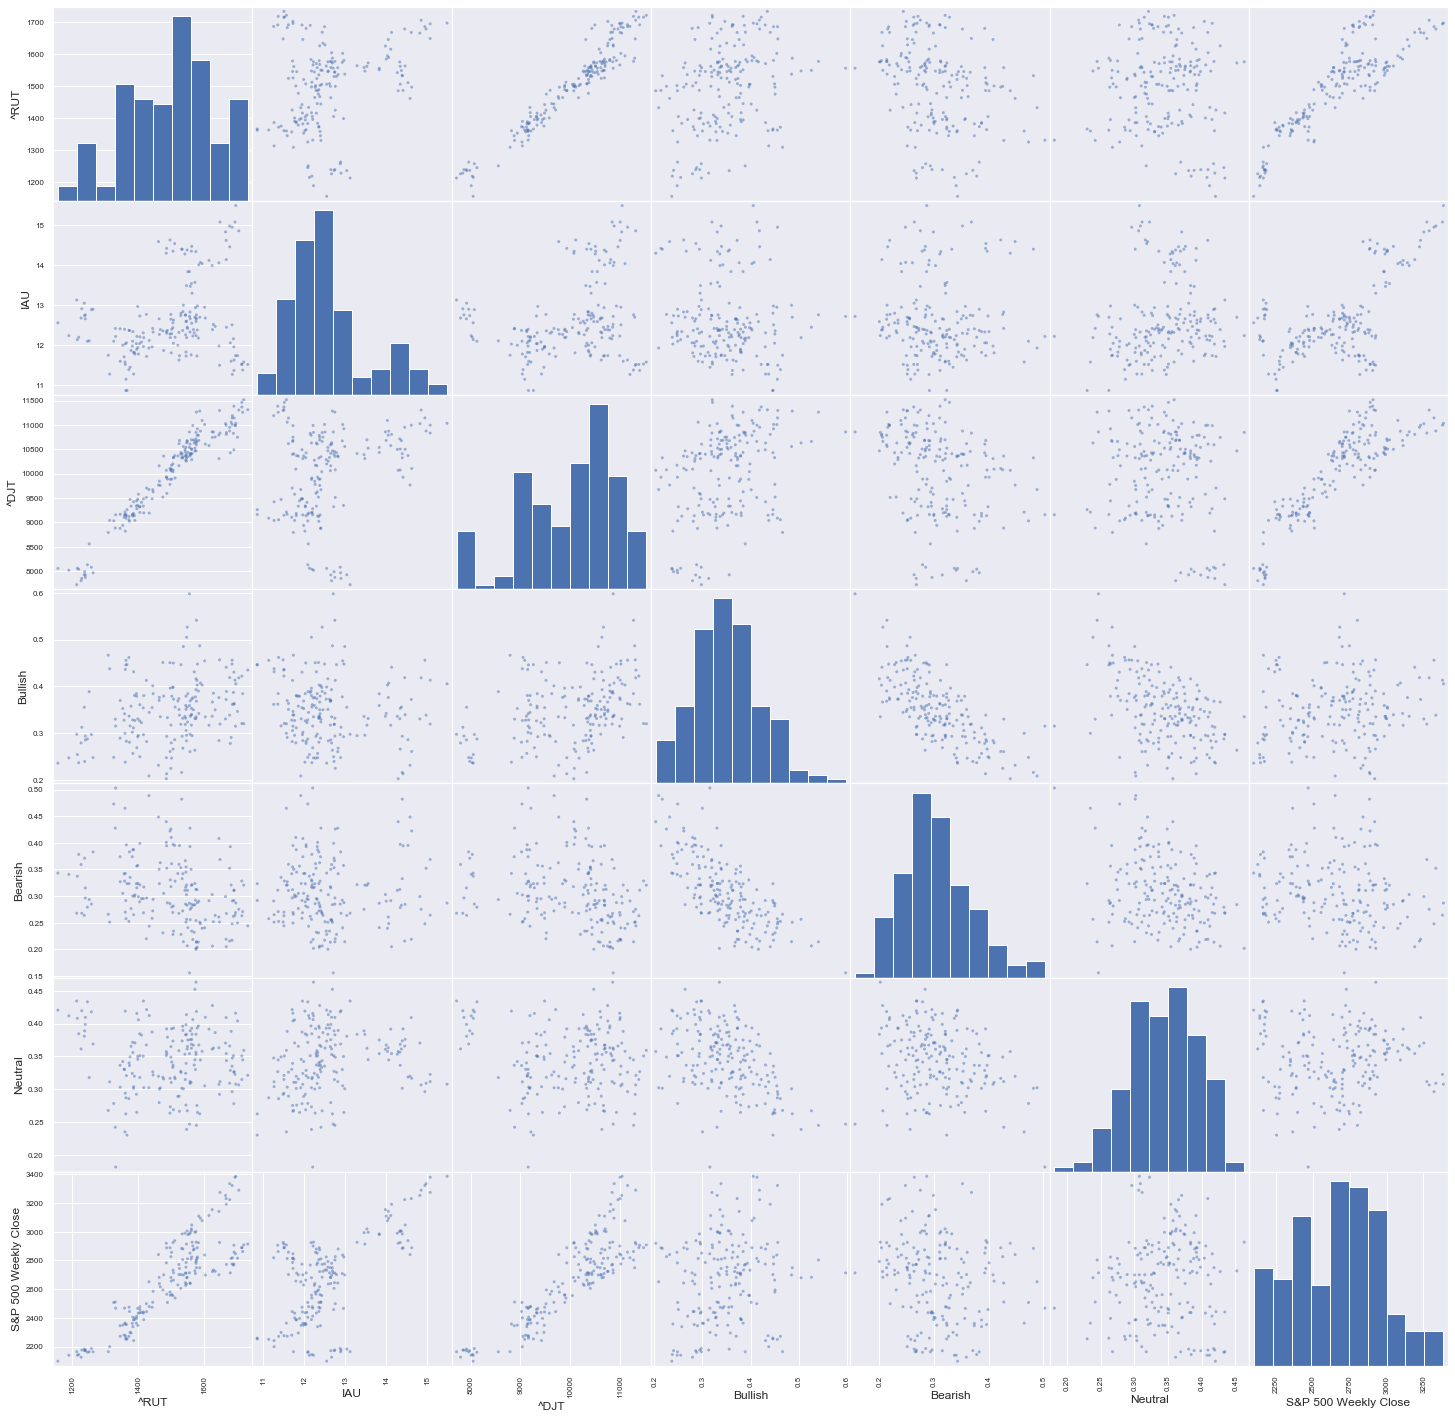

In [101]:
pd.plotting.scatter_matrix(yf_data, figsize=(25,25))

In [102]:
yf_data.corr()

,^RUT,IAU,^DJT,Bullish,Bearish,Neutral,S&P 500 Weekly Close
^RUT,1.000000,0.280611,0.963678,0.320589,-0.305397,-0.052493,0.869721
IAU,0.280611,1.000000,0.265816,-0.114271,0.003658,0.153866,0.632419
^DJT,0.963678,0.265816,1.000000,0.371070,-0.307257,-0.120149,0.869374
Bullish,0.320589,-0.114271,0.371070,1.000000,-0.722491,-0.459435,0.165582
Bearish,-0.305397,0.003658,-0.307257,-0.722491,1.000000,-0.282154,-0.180683
Neutral,-0.052493,0.153866,-0.120149,-0.459435,-0.282154,1.000000,0.002376
S&P 500 Weekly Close,0.869721,0.632419,0.869374,0.165582,-0.180683,0.002376,1.000000


In [108]:
print(fred.shape)
fred.corr()

(7, 10)


,^RUT,IAU,^DJT,Bullish,Bearish,Neutral,S&P 500 Weekly Close,PCE,unrate,idprod
^RUT,1.000000,0.440972,0.982867,0.486399,-0.138887,-0.437318,0.956235,0.854222,-0.932960,0.889992
IAU,0.440972,1.000000,0.354674,-0.051041,-0.315094,0.273430,0.659723,0.540835,-0.377498,0.380792
^DJT,0.982867,0.354674,1.000000,0.604902,-0.240079,-0.497428,0.914429,0.788375,-0.887737,0.825650
Bullish,0.486399,-0.051041,0.604902,1.000000,-0.448685,-0.787028,0.399560,0.327449,-0.314138,0.314172
Bearish,-0.138887,-0.315094,-0.240079,-0.448685,1.000000,-0.198206,-0.253215,-0.172378,0.098319,-0.023467
Neutral,-0.437318,0.273430,-0.497428,-0.787028,-0.198206,1.000000,-0.263217,-0.239930,0.276334,-0.328120
S&P 500 Weekly Close,0.956235,0.659723,0.914429,0.399560,-0.253215,-0.263217,1.000000,0.920755,-0.916388,0.892578
PCE,0.854222,0.540835,0.788375,0.327449,-0.172378,-0.239930,0.920755,1.000000,-0.939452,0.967482
unrate,-0.932960,-0.377498,-0.887737,-0.314138,0.098319,0.276334,-0.916388,-0.939452,1.000000,-0.974168
idprod,0.889992,0.380792,0.825650,0.314172,-0.023467,-0.328120,0.892578,0.967482,-0.974168,1.000000


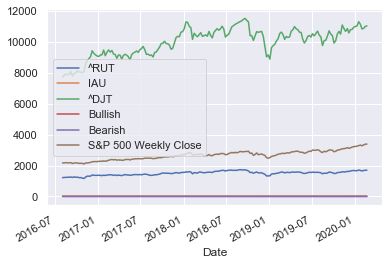

In [72]:
yf_data.plot()

In [88]:
scaler = MinMaxScaler(feature_range=(0, 1000))
to_plot = scaler.fit_transform(yf_data)
yf_data.columns.tolist()
yf_data[yf_data.columns.tolist()] = scaler.fit_transform(yf_data[yf_data.columns.tolist()])


,^RUT,IAU,^DJT,Bullish,Bearish,S&P 500 Weekly Close
^RUT,1.000000,0.280611,0.963678,0.320589,-0.305397,0.869721
IAU,0.280611,1.000000,0.265816,-0.114271,0.003658,0.632419
^DJT,0.963678,0.265816,1.000000,0.371070,-0.307257,0.869374
Bullish,0.320589,-0.114271,0.371070,1.000000,-0.722491,0.165582
Bearish,-0.305397,0.003658,-0.307257,-0.722491,1.000000,-0.180683
S&P 500 Weekly Close,0.869721,0.632419,0.869374,0.165582,-0.180683,1.000000


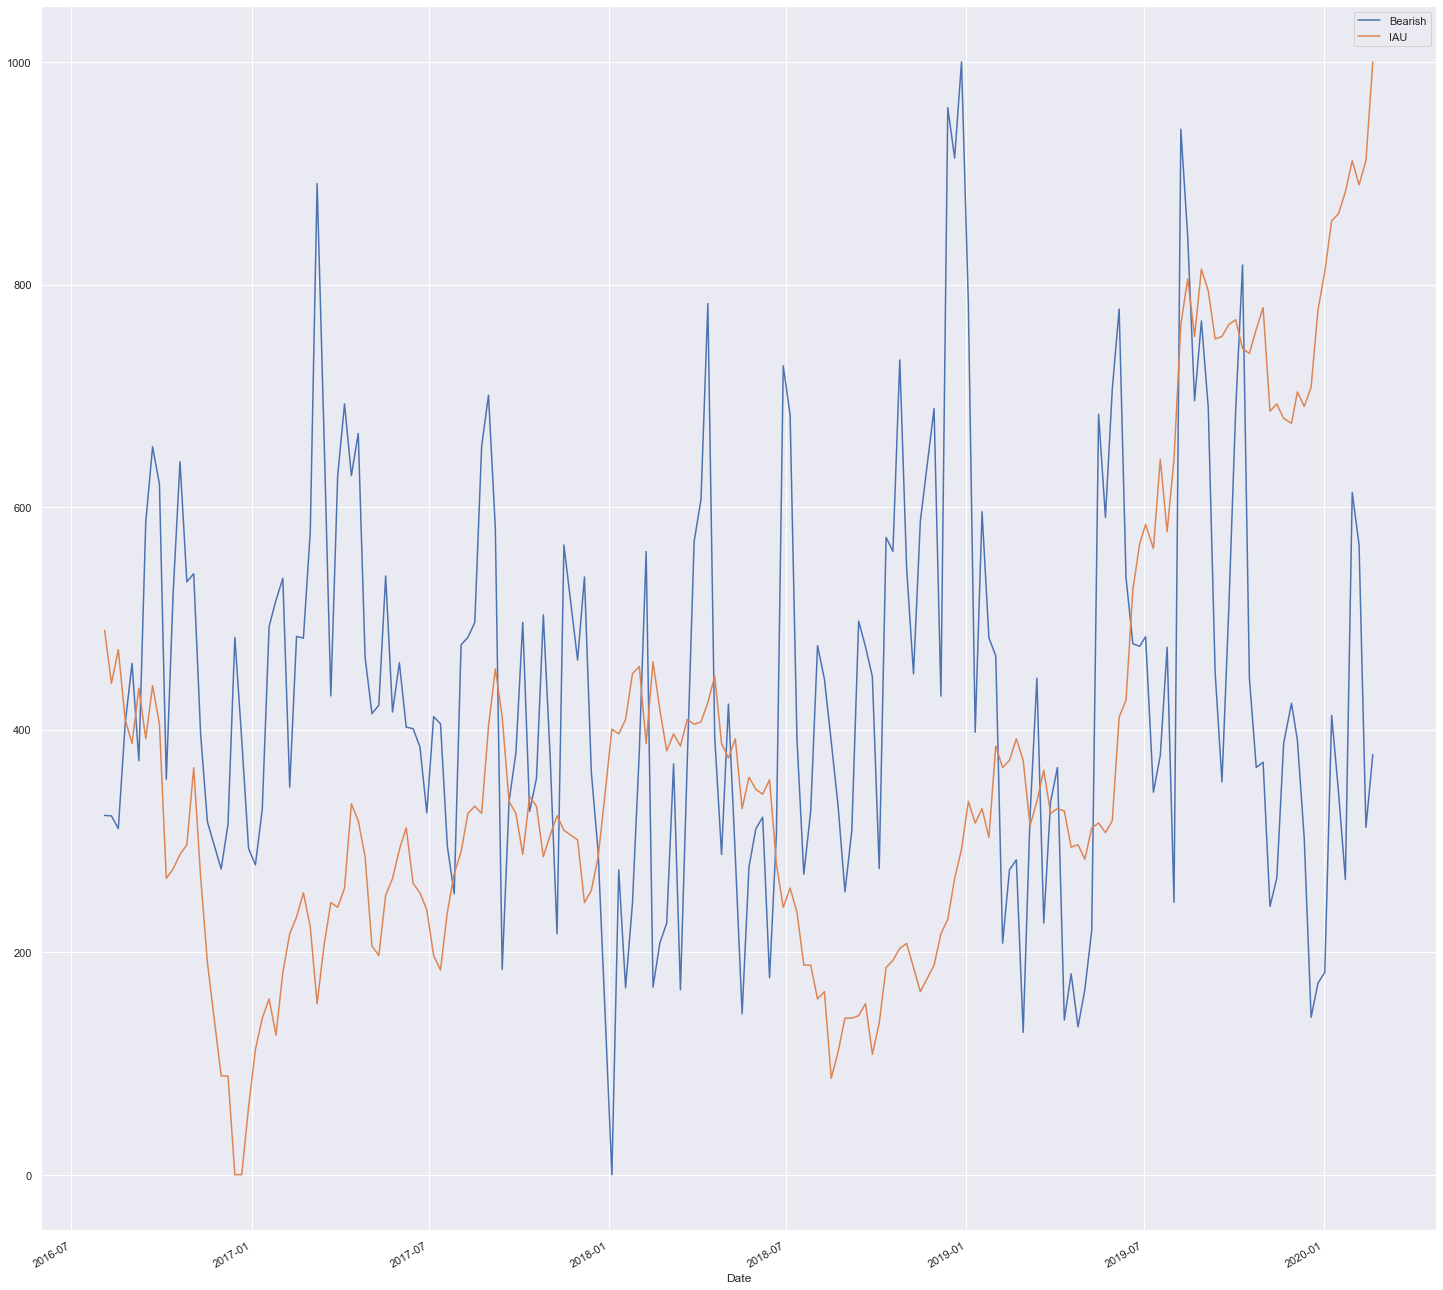

In [90]:
yf_data[['Bearish', 'IAU']].plot(figsize=(25,25))

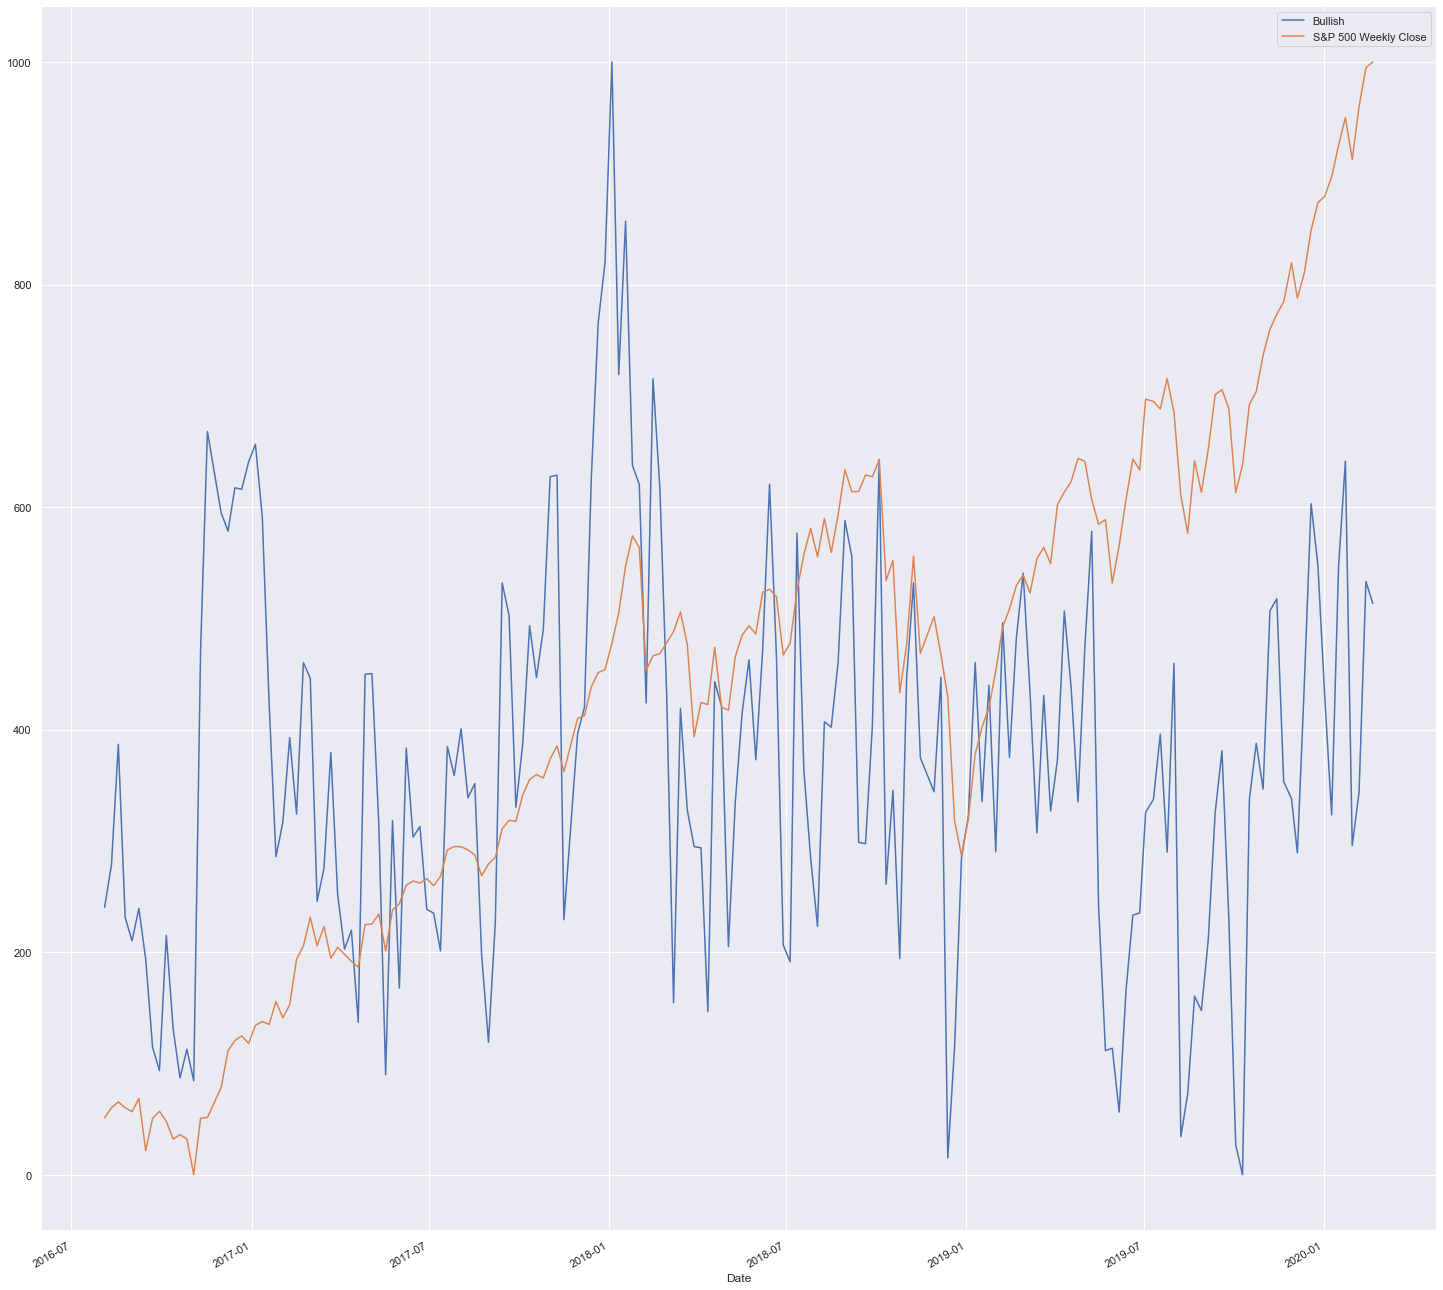

In [97]:
yf_data[['Bullish',  'S&P 500 Weekly Close']].plot(figsize=(25,25))

In [94]:
fred

,PCE,unrate,idprod
Date,,,
1959-01-01,306.1,6.0,22.6250
1959-02-01,309.6,5.9,23.0681
1959-03-01,312.7,5.6,23.4004
1959-04-01,312.2,5.2,23.8989
1959-05-01,316.1,5.1,24.2589
...,...,...,...
2019-08-01,14682.4,3.7,109.8543
2019-09-01,14707.8,3.5,109.4800
2019-10-01,14740.7,3.6,109.0086


In [2]:
print('ciao')

ciao
